## Loading the Dataset

In this step, the Titanic dataset was loaded into a pandas DataFrame. The first five rows are shown to verify that the dataset has been loaded successfully.

In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
file_path = 'C:\\Users\\7981\\Desktop\\titanicdata.csv'  # Set the path to where the file is located on your system
data = pd.read_csv(file_path)

# Display the first few rows to make sure it's loaded correctly
print(data.head())


   Survived  Pclass  Sex   Age
0         0       3    2  22.0
1         1       1    1  38.0
2         1       3    1  26.0
3         1       1    1  35.0
4         0       3    2  35.0


## Splitting Data Set and Setting Random Seed

The random seed of the `numpy` library is set to `42`. Then, the data set was divided into features and target variable. 60% of the data set was divided into training set, and the remaining 40% was divided into validation and test sets. Validation and test sets were equally divided into 20% each.

In [2]:
import numpy as np

np.random.seed(42)
from sklearn.model_selection import train_test_split


X = data.iloc[:, 1:]  
y = data.iloc[:, 0]  

# Split the data into 60% training and 40% remaining
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the remaining data into 50% validation and 50% test (which is 20% of the original data each)
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)


## Scaling Features

`fit_transform` was applied only on the training data using `MinMaxScaler`. With this process, the data to be used during training of the model was scaled. Validation data is only scaled with `transform`, so the test data remains invisible to the model and we prevent data leakage.

## Datasets and Scaling Statistics

Finally, we checked the accuracy of the operations by printing the dimensions of each data set and the first few lines of the scaled data. Additionally, by showing the minimum and maximum values used by the scaler, it was verified that the scaling process was performed within the expected range.

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the validation data
X_validation_scaled = scaler.transform(X_validation)

# We do not touch the test data here to prevent data leakage
# Printing sizes of each dataset

print("\nSizes of each set:")
print("Training set size:", X_train.shape)
print("Validation set size:", X_validation.shape)
print("Test set size:", X_test.shape)

# Print scaled data
print("\nFirst few rows of scaled training data:")
print(X_train_scaled[:5])



Sizes of each set:
Training set size: (534, 3)
Validation set size: (178, 3)
Test set size: (179, 3)

First few rows of scaled training data:
[[0.5        1.         0.77381252]
 [1.         1.         0.09525006]
 [1.         1.         0.39683338]
 [1.         0.         0.24604172]
 [0.5        0.         0.34656949]]


In [4]:
# Print the min and max of the unscaled data
print("\nMin of unscaled training data:")
print(X_train.min())

print("\nMax of unscaled training data:")
print(X_train.max())

# Print the min and max used by the scaler
print("\nMin used by the scaler:")
print(scaler.data_min_)

print("\nMax used by the scaler:")
print(scaler.data_max_)



Min of unscaled training data:
Pclass    1.00
Sex       1.00
Age       0.42
dtype: float64

Max of unscaled training data:
Pclass     3.0
Sex        2.0
Age       80.0
dtype: float64

Min used by the scaler:
[1.   1.   0.42]

Max used by the scaler:
[ 3.  2. 80.]


When building the logistic regression model, the first step is to initialize the model parameters (weight vector `w`). The model contains a vector containing a weight for each feature and a bias term. Zero was used as the initial values of the weights, which provides a starting point for the first step of the gradient descent algorithm. The logistic regression model uses the sigmoid activation function to transform the outputs into a probability value between 0 and 1. The cost (loss) function was used to evaluate the performance of the logistic regression model. The binary cross-entropy loss function was implemented. This function measures the difference between the model's actual values and its predictions and is an indicator of how well the model is performing. The function is calculated as the average of the sum of negative log odds over all data points. Gradient descent algorithm was used to adjust the parameters of the model to minimize the cost function. This algorithm updates the parameters in line with the gradient of the cost function at each iteration. The learning rate (`α`) controls the magnitude of these updates and is set to 0.1 for this example. The algorithm is run for the specified number of iterations (100 in this example). The model is trained using the training data, and both training and validation losses are calculated at each iteration. At the end of this process, a graph is drawn showing how the training and validation losses change over the iterations for each. The graph shows loss values versus number of iterations and provides an overview of the model's training process.

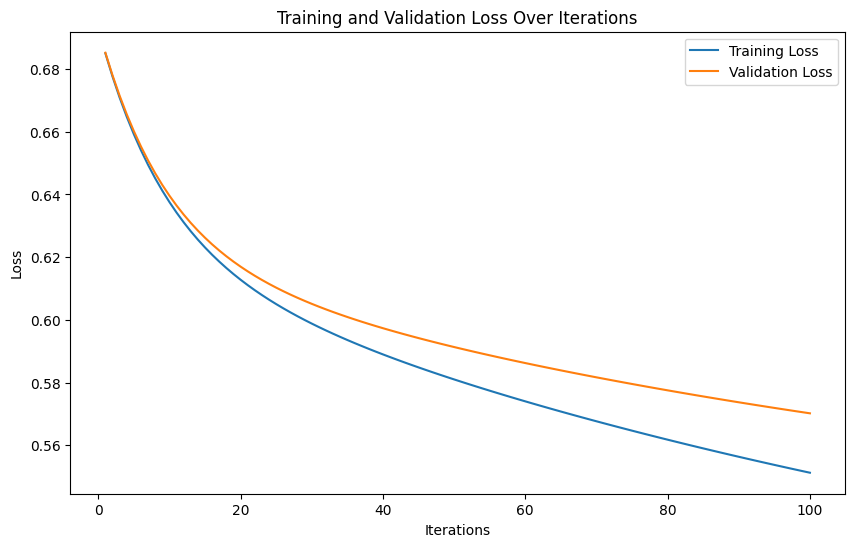

In [5]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Initialize the model parameters w
def initialize_parameters(n_features):
    w = np.zeros(n_features + 1)  # +1 for the bias term
    return w

# Step 2: Implement the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 3: Implement the cost function J(w)
def compute_cost(X, y, w):
    m = len(y)
    predictions = sigmoid(np.dot(X, w))
    cost = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Modified Step 4: Implement the gradient descent algorithm
def gradient_descent(X, y, X_val, y_val, w, learning_rate, iterations):
    m = len(y)
    cost_history = []
    val_cost_history = []

    for i in range(iterations):
        predictions = sigmoid(np.dot(X, w))
        gradient = np.dot(X.T, (predictions - y)) / m
        w -= learning_rate * gradient
        cost = compute_cost(X, y, w)
        cost_history.append(cost)
        
        # Calculate validation cost if validation data is provided
        if X_val is not None and y_val is not None:
            val_cost = compute_cost(X_val, y_val, w)
            val_cost_history.append(val_cost)
        
    return w, cost_history, val_cost_history

# Step 3 of the homework: Set learning rate and train the model
learning_rate = 0.1
iterations = 100

# Add 1 to the beginning of each feature vector X for the bias term
X_train_bias = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
X_validation_bias = np.hstack((np.ones((X_validation_scaled.shape[0], 1)), X_validation_scaled))

# Initialize the parameters
n_features = X_train_scaled.shape[1]
w = initialize_parameters(n_features)

# Train the model using gradient descent
w, training_cost_history, validation_cost_history = gradient_descent(X_train_bias, y_train, X_validation_bias, y_validation, w, learning_rate, iterations)

# Plotting the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), training_cost_history, label='Training Loss')
plt.plot(range(1, iterations + 1), validation_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Iterations')
plt.legend()
plt.show()


## Hyperparameter Optimization


The performance of the model was tried to be optimized by using various learning rates and iteration numbers. The `run_experiments` function experiments on different combinations of learning rates and iteration numbers, recording the validation loss for each combination. This process helps determine the best model parameters. An attempt was made to maximize the generalization ability of the model by choosing the combination of learning rate and number of iterations with the lowest validation loss. This step determines how our model performs on the data it encounters during the training process and which parameters work best. The training and validation datasets were combined to train the final model with the selected hyperparameters. The final model is retrained on the combined data set.

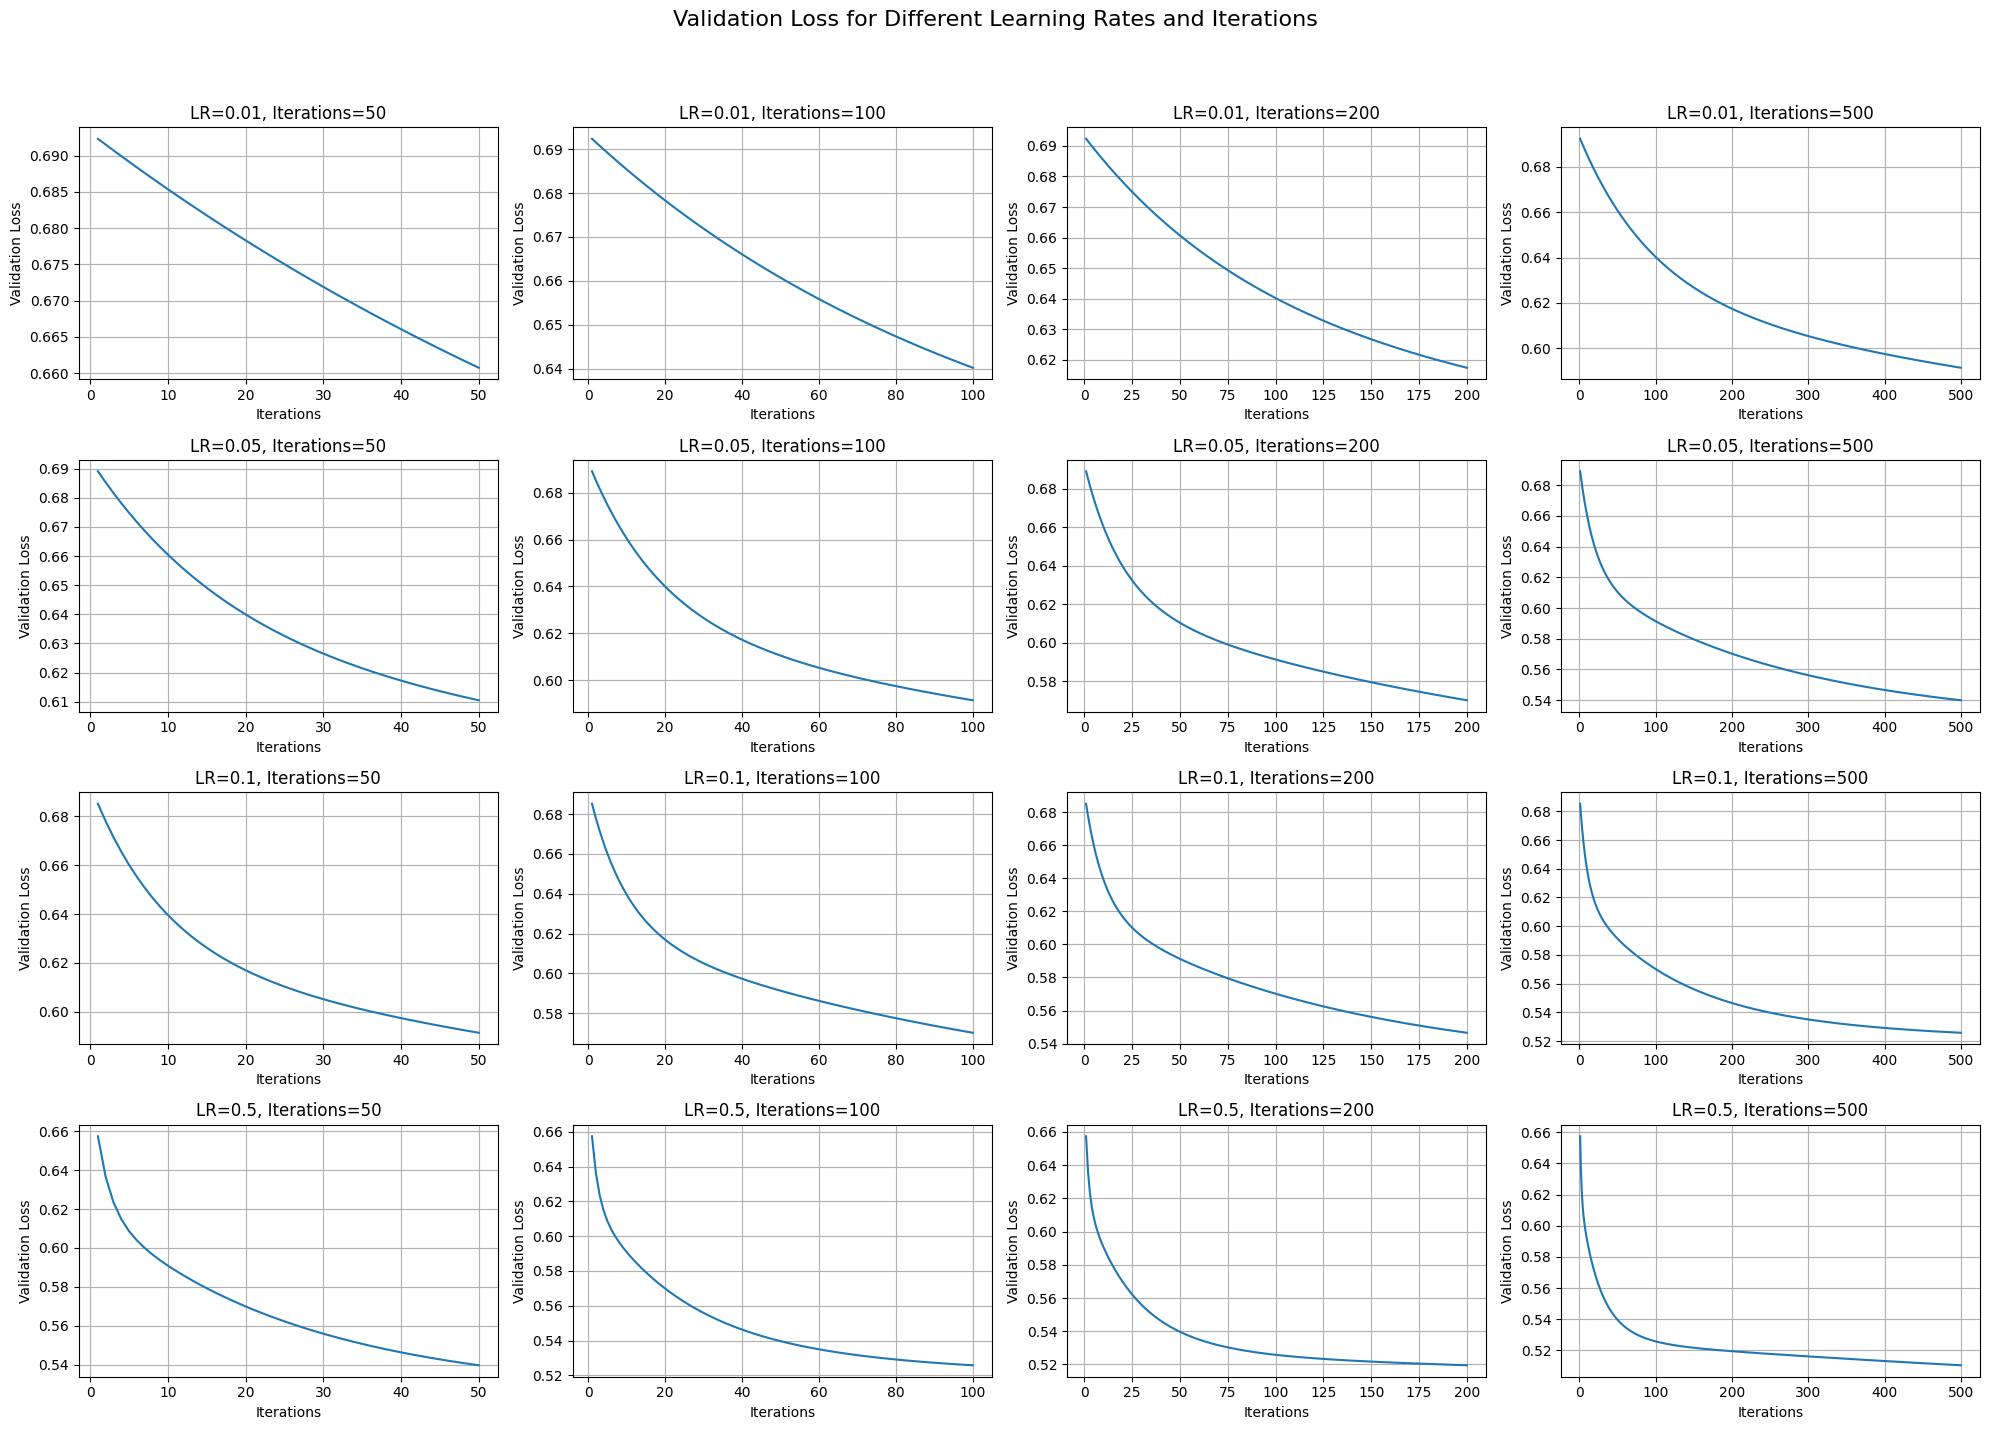

In [6]:
# Necessary imports for the extended code
import numpy as np
import matplotlib.pyplot as plt

# Define a function to run experiments with different learning rates and iteration counts
def run_experiments(X_train, y_train, X_val, y_val, learning_rates, iterations_list):
    results = {}
    for learning_rate in learning_rates:
        for iterations in iterations_list:
            # Initialize parameters for each experiment
            w = initialize_parameters(X_train.shape[1] - 1)  # Subtract 1 because we added a bias term earlier
            
            # Train the model
            w, training_cost_history, validation_cost_history = gradient_descent(
                X_train, y_train, X_val, y_val, w, learning_rate, iterations)
            
            # Store results
            results[(learning_rate, iterations)] = validation_cost_history
    
    return results

# Define learning rates and iterations to test
learning_rates = [0.01, 0.05, 0.1, 0.5]
iterations_list = [50, 100, 200, 500]

# Run the experiments
experiment_results = run_experiments(X_train_bias, y_train, X_validation_bias, y_validation, learning_rates, iterations_list)

# Plotting the results
fig, axes = plt.subplots(len(learning_rates), len(iterations_list), figsize=(20, 15))
fig.suptitle('Validation Loss for Different Learning Rates and Iterations', fontsize=16)

for i, lr in enumerate(learning_rates):
    for j, iter_count in enumerate(iterations_list):
        ax = axes[i][j]
        ax.plot(range(1, iter_count + 1), experiment_results[(lr, iter_count)])
        ax.set_title(f'LR={lr}, Iterations={iter_count}')
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Validation Loss')
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [7]:
# Find the best learning rate and number of iterations based on the lowest validation loss
best_lr = None
best_iter = None
best_val_loss = float('inf')

for lr, iter_count in experiment_results:
    val_loss = min(experiment_results[(lr, iter_count)])
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_lr = lr
        best_iter = iter_count

# Calculate the best validation accuracy
w_best, _, _ = gradient_descent(X_train_bias, y_train, X_validation_bias, y_validation, initialize_parameters(n_features), best_lr, best_iter)
predictions = sigmoid(np.dot(X_validation_bias, w_best)) >= 0.5
best_val_accuracy = np.mean(predictions.astype(int) == y_validation)

# Print the best hyperparameters and performance metrics
print(f"Best Learning Rate: {best_lr}")
print(f"Best Number of Iterations: {best_iter}")
print(f"Best Validation Loss: {best_val_loss}")
print(f"Best Validation Accuracy: {best_val_accuracy}")


Best Learning Rate: 0.5
Best Number of Iterations: 500
Best Validation Loss: 0.5105025803845868
Best Validation Accuracy: 0.7471910112359551


In [8]:
# Combine the training and validation sets
X_combined = np.vstack((X_train_scaled, X_validation_scaled))
y_combined = np.concatenate((y_train, y_validation))

# Add 1 to the beginning of each feature vector in the combined set for the bias term
X_combined_bias = np.hstack((np.ones((X_combined.shape[0], 1)), X_combined))

# Retrain the final model with the chosen hyperparameters
w_final, _, _ = gradient_descent(X_combined_bias, y_combined, None, None, initialize_parameters(n_features), best_lr, best_iter)


In [9]:
# Scale the test data using the same scaler that was fit on the training data
X_test_scaled = scaler.transform(X_test)  # Make sure to only transform, not fit!

# Add 1 to the beginning of each feature vector X for the bias term
X_test_bias = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

# Make predictions on the test data
test_predictions = sigmoid(np.dot(X_test_bias, w_final)) >= 0.5

# Calculate the test accuracy
test_accuracy = np.mean(test_predictions == y_test)

# Report the test accuracy
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.7932960893854749
